[View in Colaboratory](https://colab.research.google.com/github/eurismarpires/colab_test/blob/master/music21_lstm_v5.ipynb)

In [1]:
!git clone https://github.com/llSourcell/Music_Generator_Demo.git

Cloning into 'Music_Generator_Demo'...
remote: Counting objects: 218, done.
remote: Total 218 (delta 0), reused 0 (delta 0), pack-reused 218
Receiving objects: 100% (218/218), 66.15 KiB | 4.72 MiB/s, done.
Resolving deltas: 100% (40/40), done.


In [3]:
!pip install music21

    100% |████████████████████████████████| 17.9MB 2.4MB/s 
  Running setup.py bdist_wheel for music21 ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done
  Stored in directory: /content/.cache/pip/wheels/66/0d/71/ed677f5bec1eca6f924423a317eeb7e4df4859353861d58d44
Successfully built music21


In [0]:
from music21 import *
import pandas as pd
import glob
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.optimizers import Adam
from datetime import datetime

In [0]:
%matplotlib inline

In [8]:
!ls Music_Generator_Demo/Pop_Music_Midi

All The Small Things - Chorus.midi
All The Small Things - Verse.midi
Around The World - Chorus.midi
Around The World - Verse.midi
Baby I'm Yours - Chorus.midi
Baby One More Time - Chorus.midi
Baby One More Time - Verse.midi
Barbie Girl - Chorus.midi
Barbie Girl - Verse.midi
Beautiful Life - Chorus.midi
Beautiful Life - Pre Chorus.midi
Beautiful Life - Verse.midi
Best Day Of My Life - Chorus.midi
Blank Space - Chorus.midi
Blank Space - Pre Chorus.midi
Blank Space - Verse.midi
California Gurls - Chorus.midi
California Gurls - Pre Chorus.midi
California Gurls - Verse.midi
Call Me Maybe - Chorus.midi
Can You Feel the Love Tonight - Chorus.midi
Can You Feel the Love Tonight - Verse.midi
Chasing Pavements - Chorus.midi
Clocks - Intro.midi
Clocks - Verse.midi
Dancing Queen - Chorus.midi
Dancing Queen - Verse.midi
Dark Horse - Chorus.midi
Dark Horse - Verse.midi
Die Young - Chorus.midi
Die Young - Verse.midi
Don't Trust Me - Chorus.midi
Everybody - Chorus.midi
Every Time We Touch - Chorus.midi

In [0]:
path = 'Music_Generator_Demo/Pop_Music_Midi'

In [0]:
#path = '/home/eurismar/notebooks/geracao_music_keras-master/data'

In [0]:
files = glob.glob('{}/*.mid*'.format(path))

In [12]:
files

['Music_Generator_Demo/Pop_Music_Midi/Baby One More Time - Verse.midi',
 'Music_Generator_Demo/Pop_Music_Midi/The Scientist - Intro.midi',
 'Music_Generator_Demo/Pop_Music_Midi/Blank Space - Verse.midi',
 'Music_Generator_Demo/Pop_Music_Midi/Clocks - Verse.midi',
 "Music_Generator_Demo/Pop_Music_Midi/Don't Trust Me - Chorus.midi",
 'Music_Generator_Demo/Pop_Music_Midi/Rolling In The Deep - Chorus.midi',
 'Music_Generator_Demo/Pop_Music_Midi/Piano Man - Verse.midi',
 'Music_Generator_Demo/Pop_Music_Midi/Dancing Queen - Verse.midi',
 'Music_Generator_Demo/Pop_Music_Midi/Thinking Out Loud - Chorus.midi',
 'Music_Generator_Demo/Pop_Music_Midi/Around The World - Chorus.midi',
 'Music_Generator_Demo/Pop_Music_Midi/Every Time We Touch - Verse.midi',
 'Music_Generator_Demo/Pop_Music_Midi/Girl On Fire - Bridge.midi',
 'Music_Generator_Demo/Pop_Music_Midi/Barbie Girl - Chorus.midi',
 'Music_Generator_Demo/Pop_Music_Midi/Piano man - Bridge.midi',
 'Music_Generator_Demo/Pop_Music_Midi/The Great Es

part0.elements

In [0]:
coluna1 = []
coluna2 = []
for file in files:
    midi = converter.parse(file)
    part0 = midi[0]

    melodia = part0.getElementsByClass(note.Note)
    notas = melodia.getElementsByClass(note.Note)
    for nota in notas:
        coluna1.append(nota.pitch.midi)
        coluna2.append(nota.duration.quarterLength)

In [36]:
len(coluna1)

5893

In [37]:
len(coluna2)

5893

In [0]:
df = pd.DataFrame({"nota":coluna1,
                   "duracao":coluna2})

In [39]:
df.head()

,duracao,nota
0,1.0,81
1,1.0,81
2,1.0,81
3,1.0,81
4,1.0,81


In [40]:
df.tail()

,duracao,nota
5888,0.5,71
5889,0.5,72
5890,0.5,71
5891,0.5,71
5892,0.5,69


In [41]:
df.describe()

,duracao,nota
count,5893.000000,5893.000000
mean,0.726837,65.886136
std,0.540370,7.678147
min,0.250000,43.000000
25%,0.500000,60.000000
50%,0.500000,64.000000
75%,1.000000,72.000000
max,8.000000,91.000000


In [42]:
df['nota'].unique()

array([81, 83, 80, 76, 74, 84, 64, 57, 65, 53, 67, 48, 62, 60, 55, 69, 72,
       71, 52, 50, 45, 43, 59, 79, 77, 86, 63, 66, 56, 68, 87, 47, 88, 91,
       75, 89])

In [43]:
df['duracao'].unique()

array([1.  , 2.  , 0.5 , 0.25, 0.75, 1.5 , 3.  , 2.5 , 3.5 , 1.25, 1.75,
       2.25, 5.5 , 4.  , 2.75, 5.  , 6.  , 7.25, 8.  , 3.75, 4.5 ])

In [0]:
mlb = MultiLabelBinarizer()

In [45]:
mlb.fit(df.values)

MultiLabelBinarizer(classes=None, sparse_output=False)

In [0]:
classes = mlb.classes_

In [47]:
classes

array([0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0,
       3.5, 3.75, 4.0, 4.5, 5.0, 5.5, 6.0, 7.25, 8.0, 43.0, 45.0, 47.0,
       48.0, 50.0, 52.0, 53.0, 55.0, 56.0, 57.0, 59.0, 60.0, 62.0, 63.0,
       64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 71.0, 72.0, 74.0, 75.0, 76.0,
       77.0, 79.0, 80.0, 81.0, 83.0, 84.0, 86.0, 87.0, 88.0, 89.0, 91.0],
      dtype=object)

In [48]:
classes.shape

(57,)

In [0]:
labels = mlb.transform(df.values)

In [50]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [51]:
labels.shape

(5893, 57)

In [0]:
array_notas = df['nota'].values.astype(int)

In [53]:
array_notas.shape

(5893,)

In [0]:
array_duracao = df['duracao'].values.astype(float)

In [0]:
scaler = StandardScaler()
rawX = scaler.fit_transform(df.values)

In [56]:
rawX

array([[ 0.50555396,  1.96859307],
       [ 0.50555396,  1.96859307],
       [ 0.50555396,  1.96859307],
       ...,
       [-0.41981628,  0.66608493],
       [-0.41981628,  0.66608493],
       [-0.41981628,  0.40558331]])

In [57]:
scaler.inverse_transform(rawX[0])

array([ 1., 81.])

In [58]:
# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, rawX.shape[0] - seq_length, 1):
	seq_in = rawX[i:i + seq_length]
	seq_out = labels[i + seq_length]
	dataX.append(seq_in)
	dataY.append(seq_out)
n_patterns = len(dataX)
print("Total Patterns: ", n_patterns)

Total Patterns:  5793


In [0]:
X = np.reshape(dataX, (len(dataX), seq_length, 2))
y = np.asarray(dataY)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42,shuffle=False)

In [62]:
X_train.shape

(5213, 100, 2)

In [63]:
y_train.shape

(5213, 57)

In [64]:
X_test.shape

(580, 100, 2)

In [65]:
y_train.shape

(5213, 57)

In [66]:
X.shape

(5793, 100, 2)

In [67]:
y.shape

(5793, 57)

In [68]:
model = Sequential()
model.add(LSTM(256, input_shape=(seq_length, 2),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='sigmoid'))
adam = Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=adam,metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 256)          265216    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 256)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 57)                14649     
Total params: 805,177
Trainable params: 805,177
Non-trainable params: 0
_________________________________________________________________
None


In [69]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=10,batch_size=32, verbose=1, shuffle=False)

Train on 5213 samples, validate on 580 samples
Epoch 1/10
5213/5213 [==============================] - 70s 14ms/step - loss: 0.1862 - acc: 0.9308 - val_loss: 0.1021 - val_acc: 0.9687
Epoch 2/10
5213/5213 [==============================] - 68s 13ms/step - loss: 0.1139 - acc: 0.9644 - val_loss: 0.1015 - val_acc: 0.9687
Epoch 3/10
2432/5213 [============>.................] - ETA: 35s - loss: 0.1125 - acc: 0.9646

5213/5213 [==============================] - 68s 13ms/step - loss: 0.1135 - acc: 0.9644 - val_loss: 0.1015 - val_acc: 0.9687
Epoch 4/10
5213/5213 [==============================] - 68s 13ms/step - loss: 0.1133 - acc: 0.9647 - val_loss: 0.1017 - val_acc: 0.9687
Epoch 5/10
5120/5213 [============================>.] - ETA: 1s - loss: 0.1132 - acc: 0.9646

5213/5213 [==============================] - 68s 13ms/step - loss: 0.1133 - acc: 0.9646 - val_loss: 0.1016 - val_acc: 0.9687
Epoch 6/10
5213/5213 [==============================] - 68s 13ms/step - loss: 0.1129 - acc: 0.9646 - val_loss: 0.1015 - val_acc: 0.9687
Epoch 7/10
5213/5213 [==============================] - 68s 13ms/step - loss: 0.1132 - acc: 0.9643 - val_loss: 0.1016 - val_acc: 0.9687
Epoch 8/10
 352/5213 [=>............................] - ETA: 1:01 - loss: 0.1139 - acc: 0.9649

5213/5213 [==============================] - 67s 13ms/step - loss: 0.1128 - acc: 0.9645 - val_loss: 0.1016 - val_acc: 0.9687
Epoch 9/10
5213/5213 [==============================] - 68s 13ms/step - loss: 0.1124 - acc: 0.9646 - val_loss: 0.1017 - val_acc: 0.9687
Epoch 10/10
4608/5213 [=========================>....] - ETA: 7s - loss: 0.1116 - acc: 0.9649

5213/5213 [==============================] - 67s 13ms/step - loss: 0.1122 - acc: 0.9647 - val_loss: 0.1015 - val_acc: 0.9687


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


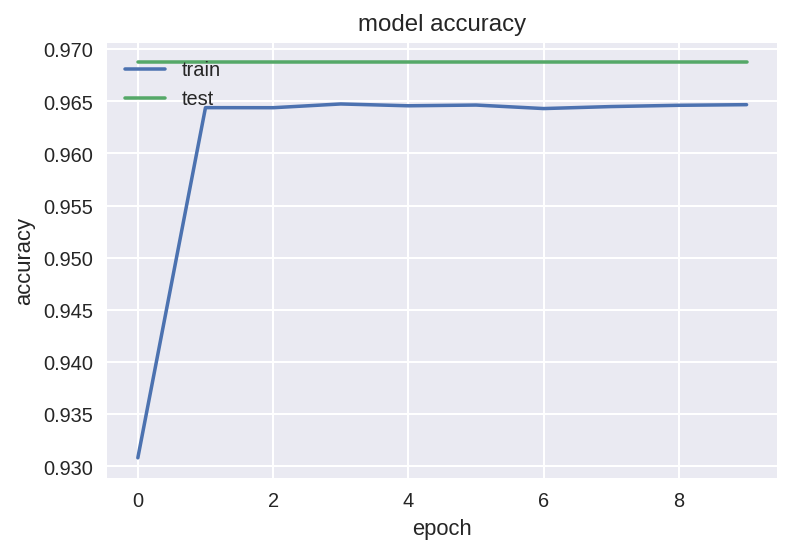

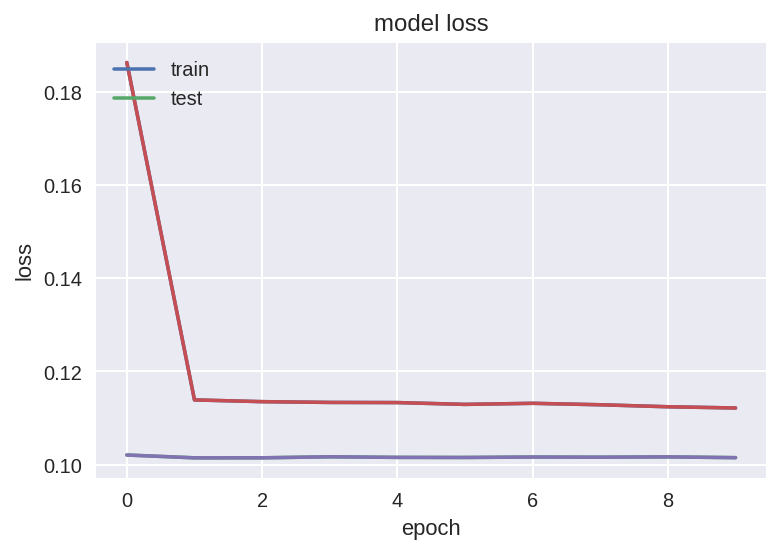

In [70]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

## **Prevendo uma sequencia**

In [71]:
start = np.random.randint(0, len(X_test)-1)
print(start)
pattern = X_test[start]
for i in range(5):
    p = np.reshape(pattern, (1, len(pattern), 2))
    prediction = model.predict(p, verbose=0)
    idxs = np.argsort(prediction[0])[::-1][:2]
    new_pattern = [mlb.classes_[idxs[0]],mlb.classes_[idxs[1]]]
    new_pattern.sort()
    t = np.asarray(new_pattern).reshape(1,2)
    pt = scaler.transform(t)
    a = np.concatenate((pattern,pt))
    b = a[1:len(a)]
    pattern = b

285


In [0]:
inverso = scaler.inverse_transform(pattern)

In [0]:
sc = stream.Score()
for i in inverso:
    n = note.Note(midi=i[1], quarterLength=i[0])
    sc.append(n)

In [75]:
sc.show('text')

{0.0} <music21.note.Note G>
{1.0} <music21.note.Note E>
{2.0} <music21.note.Note D>
{2.5} <music21.note.Note C>
{3.0} <music21.note.Note G>
{5.0} <music21.note.Note A>
{6.0} <music21.note.Note E>
{7.0} <music21.note.Note A>
{8.0} <music21.note.Note E>
{9.0} <music21.note.Note A>
{9.5} <music21.note.Note A>
{10.0} <music21.note.Note E>
{11.0} <music21.note.Note A>
{11.5} <music21.note.Note G>
{12.0} <music21.note.Note B>
{13.0} <music21.note.Note A>
{13.5} <music21.note.Note G>
{14.0} <music21.note.Note G>
{15.0} <music21.note.Note E>
{16.0} <music21.note.Note D>
{16.5} <music21.note.Note C>
{17.0} <music21.note.Note G>
{19.0} <music21.note.Note A>
{19.5} <music21.note.Note C>
{20.0} <music21.note.Note E->
{21.0} <music21.note.Note D>
{21.5} <music21.note.Note C>
{22.0} <music21.note.Note C>
{23.0} <music21.note.Note A>
{23.5} <music21.note.Note C>
{24.0} <music21.note.Note E->
{25.0} <music21.note.Note D>
{25.5} <music21.note.Note C>
{26.0} <music21.note.Note D>
{26.5} <music21.note.No

In [0]:

filename = "gerada_" + datetime.now().strftime("%Y%m%d-%H%M%S"+".mid")

In [0]:
mf = midi.translate.streamToMidiFile(sc)
mf.open(filename, 'wb')
mf.write()
mf.close()

In [80]:
filename

'gerada_20180611-133100.mid'

In [0]:
from google.colab import files

In [0]:
files.download(filename) 

# para ouvir o audio gerado
https://onlinesequencer.net/import

## tentar statefull
### http://philipperemy.github.io/keras-stateful-lstm/